# 1. INTRODUCTION

**1.1 Identity**
- Name : Daniel Satria


**1.2 Dataset Explanation**
- The dataset is about the Telco customer churn.


**1.3 Objective**
- Getting insight from the dataset.
- Creating deep learning model and test it to our dataset.
- Creating model evaluation and model improvement.
- Predicting the class from the data inference.
- Drawing conclusion from overall milestone project.

**1.4 Notebook Disclaimer**
- I will do the title/explanation first, then later write the code.
- The title means to explain what I do or try to do with the code or to explain the output of the code itself.

___

# 2. IMPORT LIBRARY

2.1 Here import some library that will be used in this notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-10-07 16:27:52.789076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


___

# 3. DATA LOADING

3.1 Loading dataset
- Here I load the dataset that will be used for this phase 2 milestone 1.
- I also show the head and the tail of the dataset as shown below.


In [4]:
df = pd.read_csv('telco_data.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


___


# 4. Exploratory Data Analysis / EDA

4.1 Dataset shape
- There are 7043 rows and 21 columns in our dataset.
- TotalCharges is a numeric column but the type is object.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


4.2 Change column data type
- I will change the TotalCharges column data type to float64, since it's numeric column.
- There are two reasons, (1) to make the calculation easier & (2) to check whether there is missing value.

In [7]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

4.3 Checking missing value
- There are 11 missing values TotalCharges column.

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

4.4 Dropping massing value
- Since the missing values are only 11 from our total data which are 7043, I decided to drop the missing data.

In [9]:
df.dropna(inplace=True)

4.5 Re-checking the dataset shape
- Now we have 7032 data.

In [10]:
df.shape

(7032, 21)

4.6 Taking data inference
- Here I take one row as our data inference.
- Before taking the data, we assign the random seed so we can call the exact same data later.
- We got the data from index 3207 as our data inference.

In [11]:
# assign random seed, so the data inf won't be generated all over again whenever we call it
np.random.seed(997)

# taking the 1 data inference from our dataset
data_inf = df.sample(1)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3207,3694-GLTJM,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.65,92.05,No


4.7 Dropping data inference from original dataset
- Dropping the data inference from the original dataset, so later the model can predict the brand new data.
- Now, our total dataset have 7031 rows.

In [12]:
df.drop(index=data_inf.index, inplace=True)
df.shape

(7031, 21)

4.8 Spliting data train and test
- To prevent the leakage of the data, I decide to split the data early in this step.
- So, the model will do optimized work and we also can understand how much the precision of our model.
- Our data train now consist of 5624 rows and 21 columns.

In [13]:
#splitting the data train and test
data_train, data_test  = train_test_split(df, train_size=0.8, random_state=3397, stratify=df['Churn'])
print('The new shape of our data train is ', data_train.shape)
data_train.head().T

The new shape of our data train is  (5624, 21)


,6478,5426,1075,1513,6876
customerID,9330-VOFSZ,8630-QSGXK,4194-WHFCB,0661-XEYAN,6341-AEVKX
gender,Female,Male,Female,Female,Female
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,No,Yes
Dependents,No,No,Yes,No,No
tenure,60,51,59,1,62
PhoneService,Yes,Yes,Yes,No,Yes
MultipleLines,Yes,Yes,Yes,No phone service,No
InternetService,Fiber optic,DSL,Fiber optic,DSL,Fiber optic
OnlineSecurity,No,No,No,No,Yes


4.9 Checking duplicated data
- We have no dulicated data.

In [14]:
data_train.duplicated().sum()

0

4.10 Getting insight from numeric columns using describe method
- SeniorCitizen is a category column, and already binary encoded.
- There are originally only three numeric columns in this dataset. 

In [15]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5624.0,0.160562,0.367159,0.00,0.0000,0.000,0.0000,1.00
tenure,5624.0,32.375889,24.461111,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,5624.0,64.831081,30.070482,18.25,35.7500,70.300,89.9625,118.65
TotalCharges,5624.0,2284.540149,2271.032184,18.85,409.4875,1397.475,3796.9125,8684.80


4.11 Checking unique variable in category columns
- It seems that many of the columns have binary category.

In [16]:
print('- gender unique variables :', data_train['gender'].unique())
print('='*110)
print('- Partner unique variables :', data_train['Partner'].unique())
print('='*110)
print('- Dependents unique variables :', data_train['Dependents'].unique())
print('='*110)
print('- PhoneService unique variables :', data_train['PhoneService'].unique())
print('='*110)
print('- MultipleLines unique variables :', data_train['MultipleLines'].unique())
print('='*110)
print('- InternetService unique variables :', data_train['InternetService'].unique())
print('='*110)
print('- OnlineSecurity unique variables :', data_train['OnlineSecurity'].unique())
print('='*110)
print('- OnlineBackup unique variables :', data_train['OnlineBackup'].unique())
print('='*110)
print('- DeviceProtection unique variables :', data_train['DeviceProtection'].unique())
print('='*110)
print('- TechSupport unique variables :', data_train['TechSupport'].unique())
print('='*110)
print('- StreamingTV unique variables :', data_train['StreamingTV'].unique())
print('='*110)
print('- StreamingMovies unique variables :', data_train['StreamingMovies'].unique())
print('='*110)
print('- Contract unique variables :', data_train['Contract'].unique())
print('='*110)
print('- PaperlessBilling unique variables :', data_train['PaperlessBilling'].unique())
print('='*110)
print('- PaymentMethod unique variables :', data_train['PaymentMethod'].unique())
print('='*110)
print('- Churn unique variables :', data_train['Churn'].unique())

- gender unique variables : ['Female' 'Male']
- Partner unique variables : ['Yes' 'No']
- Dependents unique variables : ['No' 'Yes']
- PhoneService unique variables : ['Yes' 'No']
- MultipleLines unique variables : ['Yes' 'No phone service' 'No']
- InternetService unique variables : ['Fiber optic' 'DSL' 'No']
- OnlineSecurity unique variables : ['No' 'Yes' 'No internet service']
- OnlineBackup unique variables : ['Yes' 'No' 'No internet service']
- DeviceProtection unique variables : ['Yes' 'No' 'No internet service']
- TechSupport unique variables : ['Yes' 'No' 'No internet service']
- StreamingTV unique variables : ['Yes' 'No' 'No internet service']
- StreamingMovies unique variables : ['Yes' 'No' 'No internet service']
- Contract unique variables : ['Two year' 'Month-to-month' 'One year']
- PaperlessBilling unique variables : ['Yes' 'No']
- PaymentMethod unique variables : ['Credit card (automatic)' 'Bank transfer (automatic)' 'Mailed check'
 'Electronic check']
- Churn unique varia

4.12 Getting insight from tenure & checking its data distribution.
- As we can see above, the distribution of the data is normal.
- The column don't have any outliers either.
- Overall, there is no problem in this colum.

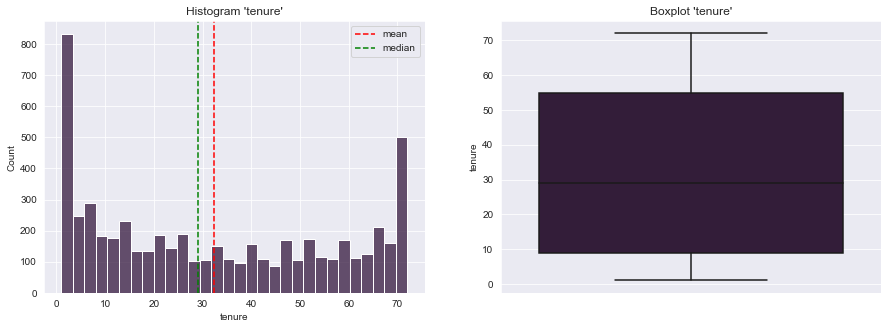

tenure Kurtosis: -1.3830398095070404
tenure Skewness: 0.23900459110762481
Columns 'tenure' is normal distribution


In [17]:
#making function for plotting the distribution of the data
def plot_dist(df, col):
    sns.set_style('darkgrid')
    sns.set_palette('rocket')
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' is right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' is left skewed".format(col))

#plotting the distribution data of limit_balance
plot_dist(data_train, 'tenure')

4.13 Getting insight from MonthlyCharges & checking its data distribution
- In this column, there is no outliers either.
- The data is normally distributed.
- Overall, there is no problem in this column

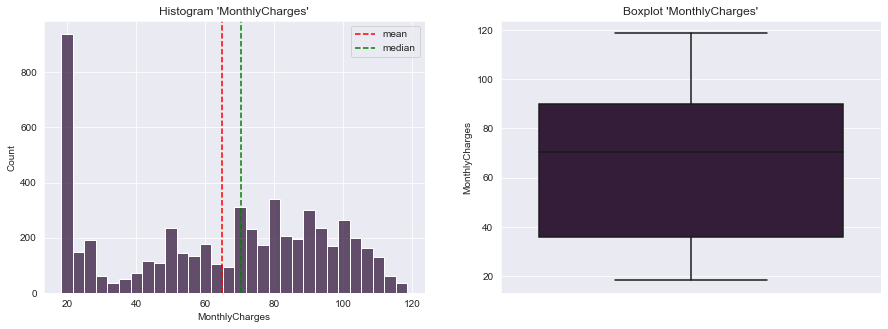

MonthlyCharges Kurtosis: -1.2582918615825849
MonthlyCharges Skewness: -0.22241717231974978
Columns 'MonthlyCharges' is normal distribution


In [16]:
plot_dist(data_train, 'MonthlyCharges')

4.14 Getting insight from TotalCharges & checking its data distribution
- In this column, there is no outliers either.
- However, the data distrbution is right-skew.

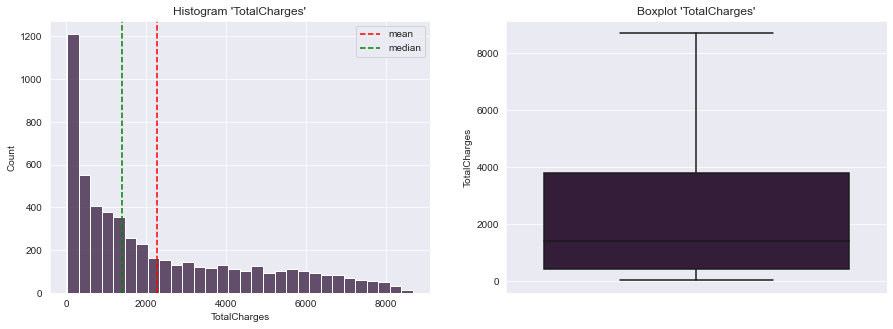

TotalCharges Kurtosis: -0.2520338753331153
TotalCharges Skewness: 0.9612904182787391
Columns 'TotalCharges' is right skewed


In [17]:
plot_dist(data_train, 'TotalCharges')

4.15 Getting inisght gender & partner columns
- It seems that the target class No, have more quantity than class Yes. 
- Also, we can say that the target may be imbalance. Yet, we need to check further later.
- From below plot, we can comprehend that gender won't affect much to the target Churn since both of gender have more values in class No.
- The same with partner column, it seems that the column don't have any significant effect to the target since they also have more quantity for class No for both categories than the class Yes.
- We can consider to drop these two columns later.

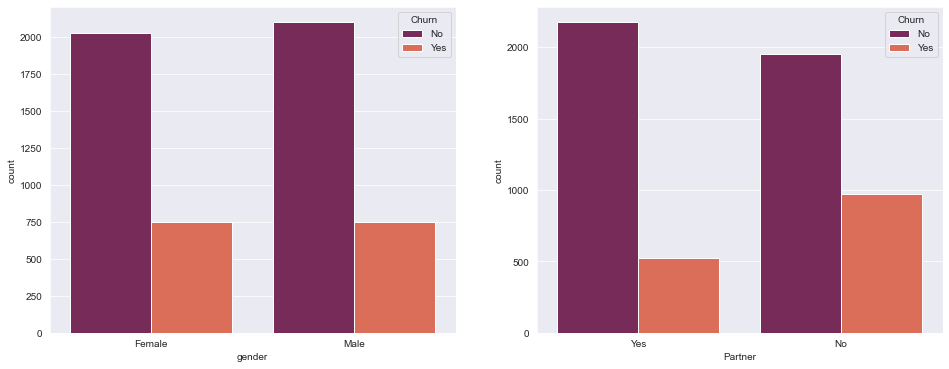

In [18]:
#create count plot function so that later we can use it again
def plot_count(x1, x2):
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    sns.countplot(data=data_train, x=x1, hue='Churn', ax=ax[0], palette='rocket')
    sns.countplot(data=data_train, x=x2, hue='Churn', ax=ax[1], palette='rocket')

#plotting the gender & partner
plot_count('gender', 'Partner')

4.16 Gettting insight from Dependents & PhoneService
- The No value in Dependents column have more quantity and the Yes one. It seems for both categories the No class are higher than the Yes class.
- The people that have PhoneService seems higher than the people who don't, the difference is more than 3 times. But for both value categories have more No class than Yes class.

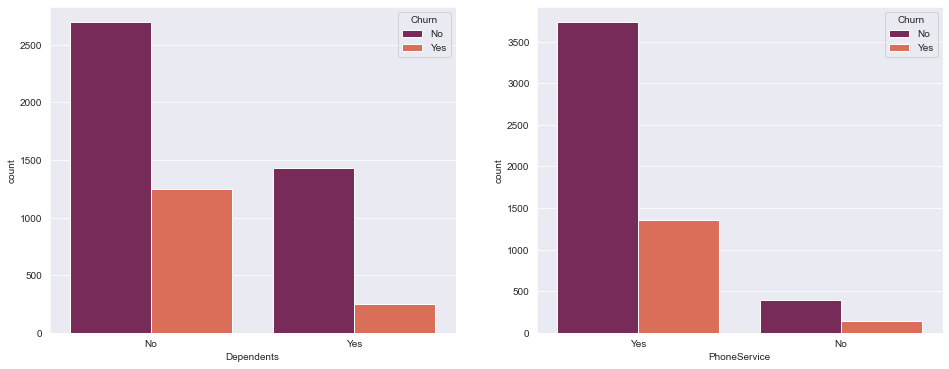

In [19]:
plot_count('Dependents', 'PhoneService')

4.17 Getting insight from MultipleLines & InternetService
- The people have phone services are higher than the people who don't. And the people who have multiple lines is less than the people who have it, but the difference is not sifnificant. The effect on target also is not easily spotted, since for every value in the column have more quantity on No class churn.
- The people who have fiber optic as they internet service tend to churn more rather than the one using DSL, or the one who don't have any.

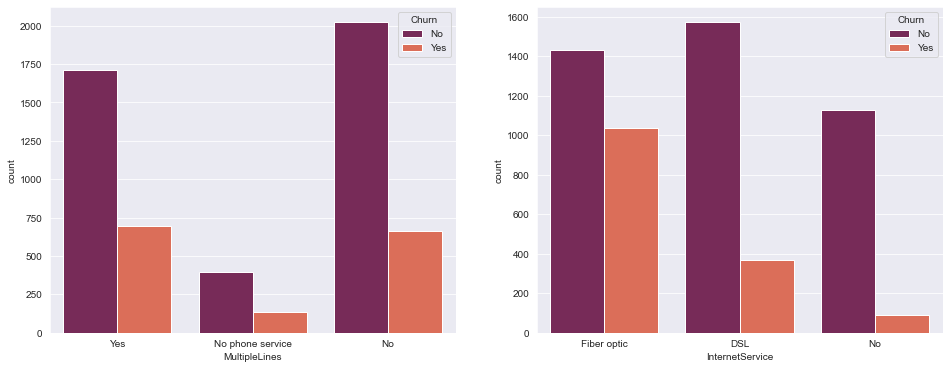

In [20]:
plot_count('MultipleLines', 'InternetService')

4.18 Getting insight from OnlineSecurity & OnlineBackup
- In OnlineSecurity column we can conclude from the plot that, the people who don't have online security tend to Churn more than others.
- In OnlineBackup column seems have similar things, that the people who don't have Online Backup tend to Churn more than others.
- We can say that these two columns have correlation related to the target.

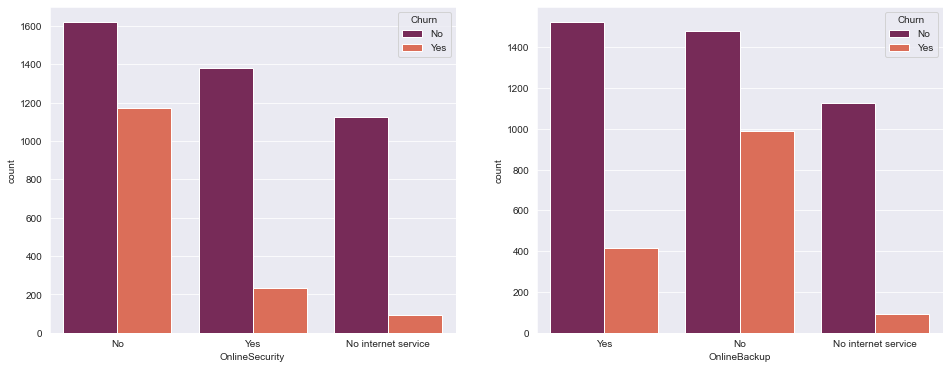

In [21]:
plot_count('OnlineSecurity', 'OnlineBackup')

4.19 Getting insight from DeviceProtection & TechSupport
- In DeviceProtection column we can conclude from the plot that, the people who don't have device protection tend to Churn more than others.
- In TechSupport column seems have similar things, that the people who don't have tech support tend to Churn more than others.
- We can say that these two columns have correlation related to the target as well.

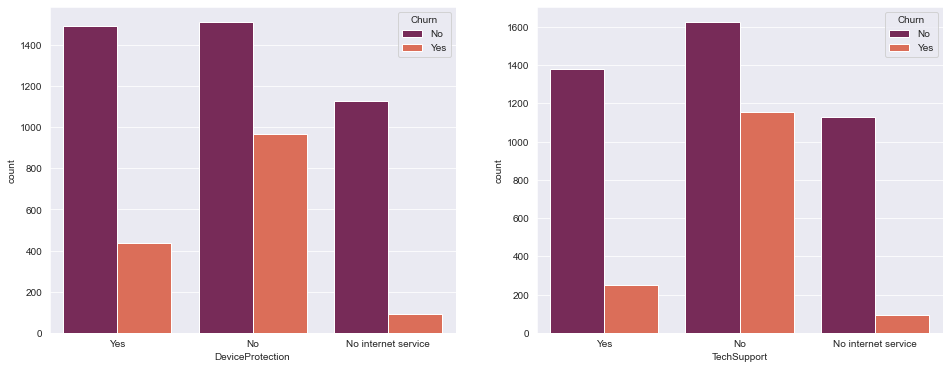

In [22]:
plot_count('DeviceProtection', 'TechSupport')

4.20 Getting insight from StreamingTV & StreamingMovies
- In column StreamingTV, the values for Yes and No are the same. However, the category for no internet service is lower than both of previous category.
- In SteamingMovies column also have the same things that between yes and no almost have no significant differences.

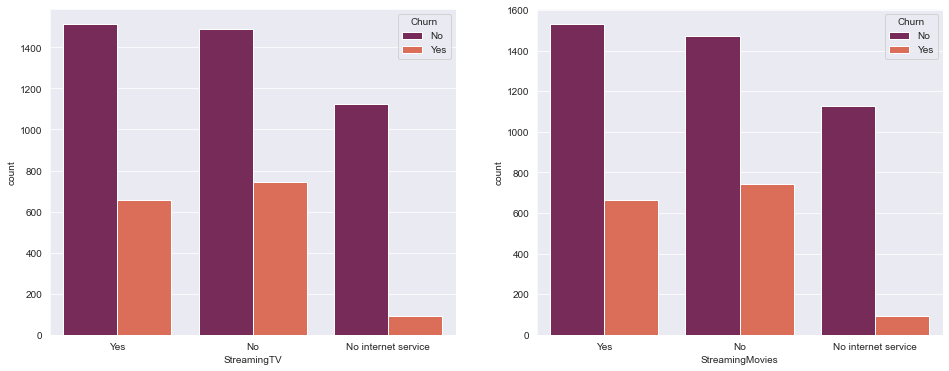

In [23]:
plot_count('StreamingTV', 'StreamingMovies')

4.21 Getting insight from Contract & PaperlessBilling
- In column Contract, the people who have contract month-to-month tend to churn more than one year and two year.
- In PaperlessBilling column, the people who have PaperlessBilling tend to churn more than the people who don't.

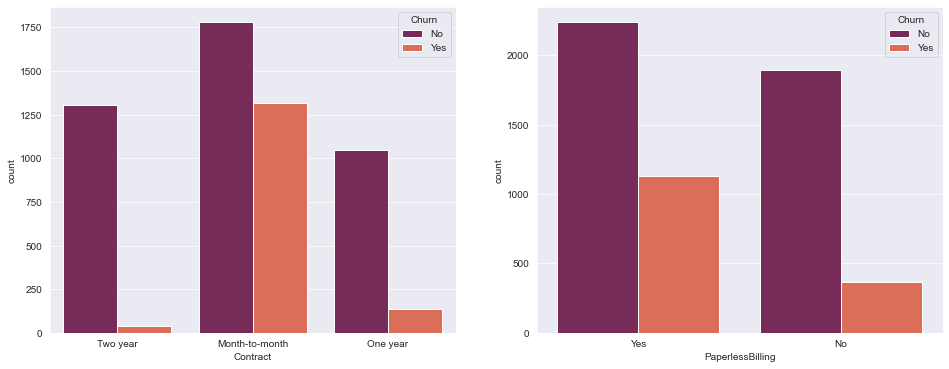

In [24]:
plot_count('Contract', 'PaperlessBilling')

4.22 Getting insight from PaymentMethod
- It seems that the people who use payment method in Electronic Check tend to churn more than other way of payment method.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

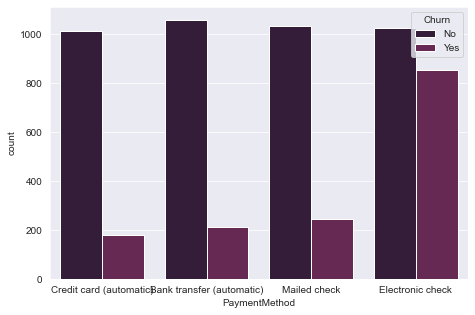

In [25]:
fig, ax = plt.subplots(figsize=(7.5,5))
sns.countplot(data=data_train, x='PaymentMethod', hue='Churn')

4.23 Checking data distribution from target
- We can conclude that the data from our target is imbalance.
- Although it's imbalance but it's still moderate, thus I won't do any imbalance handling related to the target.

<AxesSubplot:xlabel='Churn', ylabel='count'>

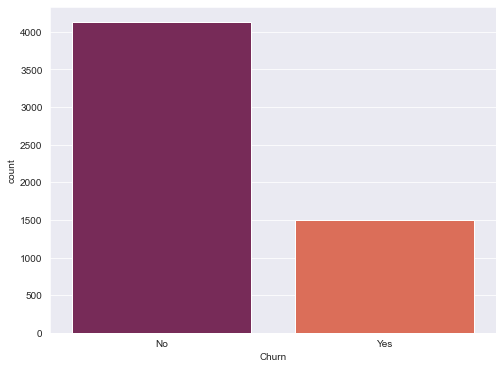

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_train, x='Churn', palette='rocket')

___

# 5. FEATURE ENGINEERING & SELECTION

5.1 Split train and dev
- Here I split once again between data train and val.
- So, the data val won't be affected with several treatment like outliers & imbalance data handling.
- Total data train now become 4506 rows.

In [18]:
#splitting the data train and test
train, val  = train_test_split(data_train, train_size=0.8, random_state=55923, stratify=data_train['Churn'])
print('The new shape of our data train is ', train.shape)
train.head().T

The new shape of our data train is  (4499, 21)


,2659,762,6080,1091,6063
customerID,3166-PNEOF,7379-POKDZ,9526-BIHHD,5832-TRLPB,0613-WUXUM
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,No,Yes,No,No,Yes
Dependents,No,No,No,No,Yes
tenure,61,3,1,29,70
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,No,No phone service,No,No
InternetService,DSL,Fiber optic,DSL,DSL,No
OnlineSecurity,Yes,No,Yes,No,No internet service


5.2 Traning pre-processing
- There is one columns I dropped related to feature selection, that is gender column since in EDA we already conclude that whether the gender is female of male doesn't make any significant difference.
- I use pipeline from sklearn to do pre-processing to make it easier.
- I use the MixMaxScaler for scaling the numeric columsn there's skew column.
- Then I use One-hot encoder for encoding the nominal categoric columns and using ordinal encoder to encoding the ordinal categoric columns.
- Since there is no outliers in the numeric columns, there's no need to do capping.


In [19]:
#reassign the columns
train_pipe_nominal = train[['PaymentMethod']]
train_pipe_number = train[['tenure', 'MonthlyCharges', 'TotalCharges']]
train_pipe_ordinal = train[['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]

#concatting the final X train for pipe line
X_train_pipe_final = pd.concat([train_pipe_nominal,train_pipe_number,train_pipe_ordinal], axis=1)

scaler = MinMaxScaler()
onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

num_col = train_pipe_number.columns.values
nominal_cat_col = train_pipe_nominal.columns.values
ordinal_col = train_pipe_ordinal.columns.values

nominal_pipe = Pipeline([
    ('nominal_encode',OneHotEncoder())])

num_pipe = Pipeline([
    ('scaling',MinMaxScaler())])

ordinal_pipe = Pipeline([('ordinal_encode',OrdinalEncoder())])

preprocess = ColumnTransformer([
    ('nom',nominal_pipe,nominal_cat_col),
    ('num',num_pipe,num_col),
    ('ordinal',ordinal_pipe,ordinal_col)])
    

pipe = Pipeline(steps=[("preprocess", preprocess)])

pipe.fit(X_train_pipe_final)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('nominal_encode',
                                                                   OneHotEncoder())]),
                                                  array(['PaymentMethod'], dtype=object)),
                                                 ('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  array(['Partner', 'Depende

5.3 Finalizing X_train & assigning y_train
- Here I use transform method to transform all the columns for X_train.
- Then I assign the y_train as well.
- Encoding the target value manually 0 and 1 in y_train

In [20]:
transform_X_train = pipe.transform(X_train_pipe_final)
X_train = pd.DataFrame(transform_X_train)

#assigning y_train
y_train = train['Churn'].replace({'No':0, 'Yes':1})

# DATA VALIDATION PREPROCESSING

5.4 Pre-processing for data validation
- Here I do the same thing for the data validation, I exclude the gender column.

In [21]:
#reassign the columns
val_pipe_nominal = val[['PaymentMethod']]
val_pipe_number = val[['tenure', 'MonthlyCharges', 'TotalCharges']]
val_pipe_ordinal = val[['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]

#concatting the final X train for pipe line
val_X_pipe_final = pd.concat([val_pipe_nominal,val_pipe_number,val_pipe_ordinal], axis=1)

5.5 Finalizing X_val & assigning y_val
- Here I use transform method to transform all the columns for X_val, the same like train data.
- Then I assign the y_val as well.
- Encoding the target value manually 0 and 1 in y_val as well.

In [22]:
val_transform_X = pipe.transform(val_X_pipe_final)
X_val = pd.DataFrame(val_transform_X)

y_val = val['Churn'].replace({'No':0, 'Yes':1})

5.6 Using Tensorflow Pipeline
- To make this project even easier, I decide to use pipeline from tensorflow.
- Pass the shuffle method to training data and set buffer size to 1.300.
- For both of them I assign the batch to 64.

In [23]:
# Setting tensorFlow pipeline
# Train data
train_tf_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_tf_pipe = train_tf_pipe.shuffle(buffer_size = 1300).batch(64)

# Validation data
val_tf_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_tf_pipe = val_tf_pipe.batch(64)

2022-10-07 16:29:37.800813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5.7 Getting input shape
- Here I try to get input shape from the X_train shape method, so later we can pass this shape for modeling.

In [24]:
input_shape = X_train.shape[1]
input_shape

20

____

# 6. SEQUENTIAL MODEL DEFINITION 

6.1 Defining the Sequential Model
- Here I use 1 hidden layer.
- For the activation function here I use relu for input and hidden layer, and sigmoid for output since it's a classification case.
- To complie, I use adam optimizer.
- Loss function I use binary cross entropy since this is a bincary classification.
- And for the metric I use accuracy.


In [34]:
model_sequential = Sequential()
model_sequential.add(Dense(input_shape, activation='relu' ,input_shape=(input_shape,)))
model_sequential.add(Dense(46, activation='relu'))
model_sequential.add(Dense(1, activation='sigmoid'))
model_sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

____

# 7. SEQUENTIAL MODEL EVALUATION

7.1 Fitting the model
- Fitting the model with train, and use the validation data.
- Set the batch_size to 64 to minimize the burden of the memory.
- Set the epoch to 20, just to see how the model works. Later we can adjust this to be bigger or smaller.

In [35]:
history_sequential = model_sequential.fit(train_tf_pipe, epochs=20, batch_size=64, validation_data=(val_tf_pipe))

Epoch 1/20
71/71 [==============================] - 1s 3ms/step - loss: 0.5749 - accuracy: 0.6926 - val_loss: 0.4791 - val_accuracy: 0.7476
Epoch 2/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7677 - val_loss: 0.4249 - val_accuracy: 0.8089
Epoch 3/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7784 - val_loss: 0.4199 - val_accuracy: 0.8080
Epoch 4/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7828 - val_loss: 0.4165 - val_accuracy: 0.8107
Epoch 5/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7884 - val_loss: 0.4158 - val_accuracy: 0.8044
Epoch 6/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7891 - val_loss: 0.4156 - val_accuracy: 0.8089
Epoch 7/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.7906 - val_loss: 0.4192 - val_accuracy: 0.8116
Epoch 8/20
71/71 [==

7.2 Model performance evaluation
- Both the train and val data loss are decreasing form beginning to midle epoch, but the vall loss is a bit increasing in the last epoch.
- The accuracy for both train and val are increasing from beginning to last epoch.

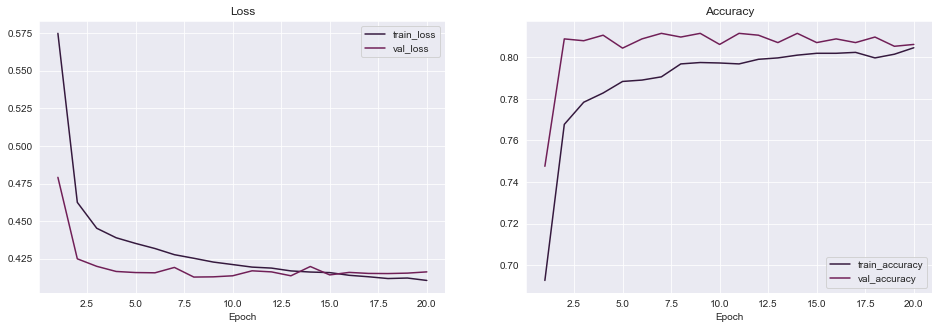

In [36]:
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_sequential.history['loss'],label='train_loss')
ax[0].plot(range(1,epoch+1),history_sequential.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_sequential.history['accuracy'],label='train_accuracy')
ax[1].plot(range(1,epoch+1),history_sequential.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

___

# 8. SEQUENTIAL MODEL IMPROVEMENT

8.1 Defining the improvement for Sequential Model
- Here I add 4 for hidden layers, the total hidden layers now become 5.
- The number of neuron in each hiddren layer I set to increasing from input later and then decreased as to approach the output layer. With this configuration, we hope that the weighl calculation of each neuron will perform better.
- In all hidden layers I set the activation function to be relu, the same like default one.
- However, for the optimizer I will be using SGD with 0.01 learning rate in hope that the model will find the optimum way in its calculation when we fit it to the data.
- Setting the epoc to 100, so we can see how the model perform in the bigger picture.

In [37]:
model_sequential_improvement = Sequential()
model_sequential_improvement.add(Dense(input_shape, activation='relu' ,input_shape=(input_shape,)))
model_sequential_improvement.add(Dense(46, activation='relu'))
model_sequential_improvement.add(Dense(92, activation='relu'))
model_sequential_improvement.add(Dense(184, activation='relu'))
model_sequential_improvement.add(Dense(92, activation='relu'))
model_sequential_improvement.add(Dense(46, activation='relu'))
model_sequential_improvement.add(Dense(1, activation='sigmoid'))
model_sequential_improvement.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics='accuracy')
model_sequential_improvement.fit(train_tf_pipe, epochs=100, batch_size=64, validation_data=(val_tf_pipe))

Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 0.6553 - accuracy: 0.6866 - val_loss: 0.6149 - val_accuracy: 0.7342
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7342 - val_loss: 0.5662 - val_accuracy: 0.7342
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7342 - val_loss: 0.5439 - val_accuracy: 0.7342
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7342 - val_loss: 0.5303 - val_accuracy: 0.7342
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7342 - val_loss: 0.5178 - val_accuracy: 0.7342
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7342 - val_loss: 0.5039 - val_accuracy: 0.7342
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7342 - val_loss: 0.4905 - val_accuracy: 0.7342
Epoch 8/100
7

____

# 9. IMPROVEMENT SEQUENTIAL MODEL EVALUATION

9.1 Evaluation of Improved Sequential Model
- In loss graph, we can see both train and validation loss are decreasing. Train keep decreasing but the validation somehow stagnan in 0.425.
- In accuracy graph, we can see that the accuracy are increasing and in the last epoch both of them seems stable in the last epoch.
- We can say that the model is a bit improved.

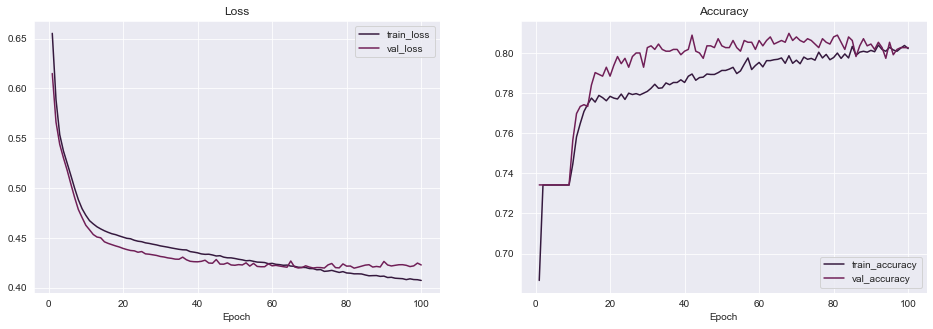

In [38]:
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_sequential_improvement.history.history['loss'],label='train_loss')
ax[0].plot(range(1,epoch+1),model_sequential_improvement.history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_sequential_improvement.history.history['accuracy'],label='train_accuracy')
ax[1].plot(range(1,epoch+1),model_sequential_improvement.history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

___

# 10. FUNCTIONAL MODEL DEFINITON

10.1 Functional Model Definition
- Here I use 4 hidden layers.
- I set the optimizer to Adam since and metrics accuracy the same with default model of sequential.
- Activation functions are relu for the layers, unless the output we use sigmoid.

In [39]:
input_layer = Input(shape=(input_shape,))
layers_1 = Dense(44, activation='relu')(input_layer)
layers_2 = Dense(88, activation='relu')(layers_1)
layers_3 = Dense(44, activation='relu')(layers_2)
layers_4 = Dense(22, activation='relu')(layers_3)
output = Dense(1, activation='sigmoid')(layers_4)

model_functional = Model(inputs=input_layer, outputs=output)
model_functional.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

____

# 11. FUNCTIONAL MODEL EVALUATION

11. Fitting the model
- Here I use 20 epoch just for default standard model, the same with sequential.
- Set batch size to 64, in order to minimize the work of our memory.

In [40]:
model_functional.fit(train_tf_pipe,  epochs=20, batch_size=64, validation_data=(val_tf_pipe))

Epoch 1/20
71/71 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7548 - val_loss: 0.4370 - val_accuracy: 0.7947
Epoch 2/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7802 - val_loss: 0.4269 - val_accuracy: 0.8062
Epoch 3/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7837 - val_loss: 0.4194 - val_accuracy: 0.8071
Epoch 4/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.7857 - val_loss: 0.4167 - val_accuracy: 0.8098
Epoch 5/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.7980 - val_loss: 0.4166 - val_accuracy: 0.8160
Epoch 6/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7964 - val_loss: 0.4169 - val_accuracy: 0.8071
Epoch 7/20
71/71 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8042 - val_loss: 0.4307 - val_accuracy: 0.8018
Epoch 8/20
71/71 [==

11.2 Evaluation of Function Model
- The train loss decreasing but the validation is increasing over the epochs. And the difference between them is quite far. It means that our model is over-fit.
- In accuracy graph also the same, that we accuracy of train keep increasing. But for the validation keep decreasing which means our model is very over-fit, as the score differences is also quite far.

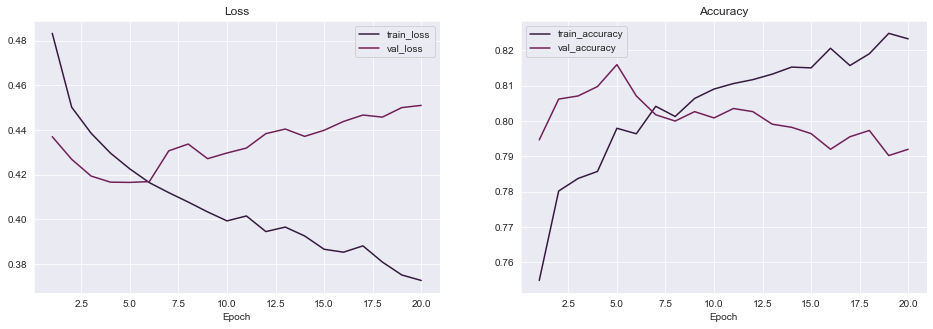

In [41]:
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_functional.history.history['loss'],label='train_loss')
ax[0].plot(range(1,epoch+1),model_functional.history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_functional.history.history['accuracy'],label='train_accuracy')
ax[1].plot(range(1,epoch+1),model_functional.history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

____

# 12. FUNCTIONAL MODEL IMPROVEMENT

12.1 Defining improvement for Functional Model
- To seek the improvement, I use the optimizer SGD.
- Setting the epoch to 100, so we can see the perform of our model in bigger picture.

In [42]:
input_layer = Input(shape=(input_shape,))
layers = Dense(44, activation='relu')(input_layer)
layers = Dense(88, activation='relu')(layers)
layers = Dense(44, activation='relu')(layers)
layers = Dense(22, activation='relu')(layers)
output = Dense(1, activation='sigmoid')(layers)

model_functional_improvement = Model(inputs=input_layer, outputs=output)
model_functional_improvement.compile(loss='binary_crossentropy',optimizer='SGD',metrics='accuracy')

model_functional_improvement.fit(train_tf_pipe,  epochs=100, batch_size=64, validation_data=(val_tf_pipe))

Epoch 1/100
71/71 [==============================] - 1s 3ms/step - loss: 0.6308 - accuracy: 0.6995 - val_loss: 0.5808 - val_accuracy: 0.7342
Epoch 2/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7342 - val_loss: 0.5337 - val_accuracy: 0.7342
Epoch 3/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.7342 - val_loss: 0.5038 - val_accuracy: 0.7342
Epoch 4/100
71/71 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7331 - val_loss: 0.4814 - val_accuracy: 0.7422
Epoch 5/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7424 - val_loss: 0.4640 - val_accuracy: 0.7600
Epoch 6/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7564 - val_loss: 0.4511 - val_accuracy: 0.7751
Epoch 7/100
71/71 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7673 - val_loss: 0.4423 - val_accuracy: 0.7884
Epoch 8/100
7

12.2 Evaluation of Improved Functional Model
- Not like the default functional model, now both train and validation differences not so far both for Loss and Accuracy.
- Even the accuracy almost the same for train and validation which is 0.80.
- We can say that this model is better and improved. Even for the accuracy this is better than the sequential.

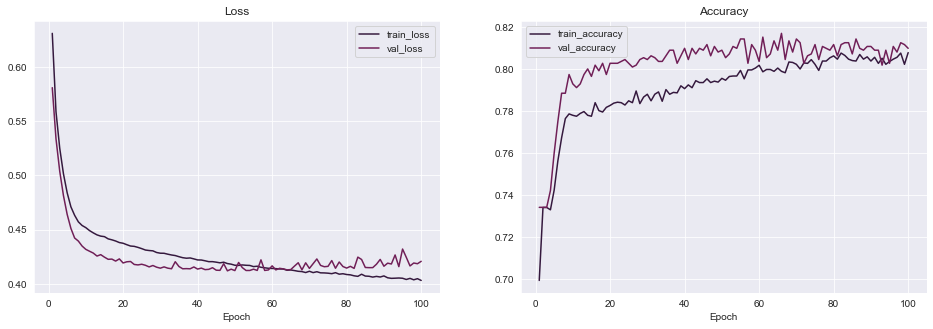

In [43]:
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_functional_improvement.history.history['loss'],label='train_loss')
ax[0].plot(range(1,epoch+1),model_functional_improvement.history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_functional_improvement.history.history['accuracy'],label='train_accuracy')
ax[1].plot(range(1,epoch+1),model_functional_improvement.history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

____

# 13. APPLICATION TO DATA DEST

13.1 Pre-processing for test data

In [44]:
#reassign the columns
test_pipe_nominal = data_test[['PaymentMethod']]
test_pipe_number = data_test[['tenure', 'MonthlyCharges', 'TotalCharges']]
test_pipe_ordinal = data_test[['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]

#concatting the final X train for pipe line
X_test_pipe = pd.concat([test_pipe_nominal,test_pipe_number,test_pipe_ordinal], axis=1)


13.2 Assigning the test data to tensorflow pipeline

In [45]:
#transforming the X_test & assign it to dataframe
X_test = pipe.transform(X_test_pipe)
X_test = pd.DataFrame(X_test)

#manual encode the y test
y_test = data_test['Churn'].replace({'No':0, 'Yes':1})

#assign test data to tensorflow pipeline
# Validation data
test_tf_pipe = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_tf_pipe = test_tf_pipe.batch(64)

13.3 Fitting model using callback & checkpoint
- Here I use functional model since it's the best model so far from previous analysis.
- The difference is I use callback parameter and checkpoints to save the best model so we can load and rollbck to the best model.
- Here I set the epochs to 200.

In [25]:
input_layer = Input(shape=(input_shape,))
layers = Dense(44, activation='relu')(input_layer)
layers = Dense(88, activation='relu')(layers)
layers = Dense(44, activation='relu')(layers)
layers = Dense(22, activation='relu')(layers)
output = Dense(1, activation='sigmoid')(layers)

model_functional_2 = Model(inputs=input_layer, outputs=output)
model_functional_2.compile(loss='binary_crossentropy',optimizer='SGD',metrics='accuracy')

checkpoint_cb = ModelCheckpoint("daniel_keras_model.h5", save_best_only=True)

history_functional_2 = model_functional_2.fit(train_tf_pipe, epochs=200,
                    validation_data=(val_tf_pipe), callbacks=[checkpoint_cb])

model_functional_2 = load_model("daniel_keras_model.h5") # rollback to best model


Epoch 1/200
71/71 [==============================] - 1s 4ms/step - loss: 0.5579 - accuracy: 0.7335 - val_loss: 0.5309 - val_accuracy: 0.7342
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7342 - val_loss: 0.5069 - val_accuracy: 0.7342
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7342 - val_loss: 0.4872 - val_accuracy: 0.7342
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7342 - val_loss: 0.4718 - val_accuracy: 0.7378
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7419 - val_loss: 0.4603 - val_accuracy: 0.7476
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7571 - val_loss: 0.4518 - val_accuracy: 0.7831
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7733 - val_loss: 0.4446 - val_accuracy: 0.7840
Epoch 8/200
7

13.4 Predicting y_train, y_val & y_test
- Here we predict all of the y values so we can evalute them.

In [47]:
#predict X_train with our improved sequential model
y_train_predict = model_functional_2.predict(train_tf_pipe)
#reshaping our array to 1D
y_train_predict_functional = y_train_predict.reshape(-1)
#applying the sigmoid function
y_train_predict_rounded = np.where(y_train_predict_functional >= 0.5, 1, 0)

#predict X_val with our improved sequential model
y_val_predict = model_functional_2.predict(val_tf_pipe)
#reshaping our array to 1D
y_val_predict_functional = y_val_predict.reshape(-1)
#applying the sigmoid function
y_val_predict_rounded = np.where(y_val_predict_functional >= 0.5, 1, 0)


#predict X_test with our improved sequential model
y_test_predict = model_functional_2.predict(test_tf_pipe)
#reshaping our array to 1D
y_test_predict_functional = y_test_predict.reshape(-1)
#applying the sigmoid function
y_test_predict_rounded = np.where(y_test_predict_functional >= 0.5, 1, 0)


22/22 [==============================] - 0s 1ms/step


13. Model Evaluation for Train, Val & Test
- The accuracy scores for test and val are not far, but for the train is too low. The difference is 0.2/20%. This means our model still underfit.
- Furthermore, since the target dataset is imbalance we can't solely see the accuracy. We need to see other scores like F1-score, recall or precition.
- Our objective is to detect the churn customer of Telco, so we need to minimize False Negative. Which means we need to see the Recall score.
- For all data train, val & test have lower recall score for class 1 (Yes). This is reasonable since the data imbalance. The class 0 is bigger than class 1, so the model work better for class 0. 
- If we see the recall score, for the test and validation, they almost have the similar score. But for the train, the difference is quite far. Which means our model still under-fit.

In [48]:
print('='*10, 'Classification Report test','='*10)
print('Functional Model \n', classification_report(y_test, y_test_predict_rounded))

========== Classification Report test ==========
Functional Model 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [49]:
print('='*10, 'Classification Report train','='*10)
print('Functional Model \n', classification_report(y_train, y_train_predict_rounded))

========== Classification Report train ==========
Functional Model 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      3303
           1       0.26      0.22      0.24      1196

    accuracy                           0.63      4499
   macro avg       0.50      0.50      0.50      4499
weighted avg       0.61      0.63      0.62      4499



In [50]:
print('='*10, 'Classification Report val','='*10)
print('Functional Model \n', classification_report(y_val, y_val_predict_rounded))

========== Classification Report val ==========
Functional Model 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       826
           1       0.70      0.55      0.61       299

    accuracy                           0.82      1125
   macro avg       0.78      0.73      0.75      1125
weighted avg       0.81      0.82      0.81      1125



____

# 14. DATA INFERENCE

14.1 Pre-processing for data inference

In [27]:
#reassign the columns
inf_pipe_nominal = data_inf[['PaymentMethod']]
inf_pipe_number = data_inf[['tenure', 'MonthlyCharges', 'TotalCharges']]
inf_pipe_ordinal = data_inf[['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]

#concatting the final X train for pipe line
X_inf_pipe_final = pd.concat([inf_pipe_nominal,inf_pipe_number,inf_pipe_ordinal], axis=1)
y_inf = data_inf['Churn'].replace({'No':0, 'Yes':1})

#transforming the X_inference and assign it to dataframe
inf_transform_X_train = pipe.transform(X_inf_pipe_final)
X_inf_final = pd.DataFrame(inf_transform_X_train)
X_inf_final.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.056338,0.013944,0.008447,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


14.2 Predicting the y_inference
- Here we try predict the target for data inference.
- The predicted class is 0. The actual class is 0.
- This means that our model can predict with the right probability for data inference.
- This is may be caused by our model work fine with class 0, so the model can predict with right prediction for data inference.

In [28]:
#predict X_test with our best functional model
y_inf_predict = model_functional_2.predict(X_inf_final)

#applying the sigmoid function
y_inf_predict = np.where(y_inf_predict >= 0.5, 1, 0)


print('The prediction for data inference is', y_inf_predict[0][0])
print('The actual target of inference is', y_inf)

1/1 [==============================] - 0s 78ms/step
The prediction for data inference is 0
The actual target of inference is 3207    0
Name: Churn, dtype: int64


_____

# 15. OVERALL ANALYSIS & CONCLUSION

- We can use deep learning model to solve problem.
- In this project, we use two kinds of models they are : (1) Sequential & (2) Functional
- The Sequential model works in sequence, on other hand functional can take non-sequence input, so we need to assign layer name one by one.
- There are many aspects that may affect our model, namely : changing neuron quantity, changing layers quantity, changing optmizer & activation function.
- We can see how our model perform by plotting the history fitting from our model.
- It's also possible for us to save our best model with check point method in tensorflow.
- The balance/imbalance target in dataset also affects our model performance. The model will work better for the target that has more quantity other than with the less quantity.
- Like in this project, the model works better for class 0 and less for class 1 since the quantity target for class 1 is much lower.